<a href="https://www.kaggle.com/code/mdaliraza/car-price-ml?scriptVersionId=104957403" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
# importing required libraries
import numpy as np # data handling library
import pandas as pd # data manipulation library
import matplotlib.pyplot as plt # data visualization library
import seaborn as sns # data visualization library
import plotly.express as px # data visualization library
import missingno as msno # data visualization library for missing data

In [2]:
# importig the data
car = pd.read_csv(r'../input/carprice-data/CarPrice_ML.csv')

### **Basic Exploration**

In [3]:
car.shape # shape of our data

(205, 26)

In [4]:
print('Number of observations    : ', car.shape[0]) # number of rows in dataset
print('Number of variables       : ', car.shape[1]) # number of columns in dataset

Number of observations    :  205
Number of variables       :  26


In [5]:
car.columns # columns we have in our dataset

Index(['car_ID', 'symboling', 'CarName', 'fueltype', 'aspiration',
       'doornumber', 'carbody', 'drivewheel', 'enginelocation', 'wheelbase',
       'carlength', 'carwidth', 'carheight', 'curbweight', 'enginetype',
       'cylindernumber', 'enginesize', 'fuelsystem', 'boreratio', 'stroke',
       'compressionratio', 'horsepower', 'peakrpm', 'citympg', 'highwaympg',
       'price'],
      dtype='object')

In [6]:
car.head().T # top 5 observations

,0,1,2,3,4
car_ID,1,2,3,4,5
symboling,3,3,1,2,2
CarName,alfa-romero giulia,alfa-romero stelvio,alfa-romero Quadrifoglio,audi 100 ls,audi 100ls
fueltype,gas,gas,gas,gas,gas
aspiration,std,std,std,std,std
doornumber,two,two,two,four,four
carbody,convertible,convertible,hatchback,sedan,sedan
drivewheel,rwd,rwd,rwd,fwd,4wd
enginelocation,front,front,front,front,front
wheelbase,88.6,88.6,94.5,99.8,99.4


In [7]:
car.tail().T # last 5 observation

,200,201,202,203,204
car_ID,201,202,203,204,205
symboling,-1,-1,-1,-1,-1
CarName,volvo 145e (sw),volvo 144ea,volvo 244dl,volvo 246,volvo 264gl
fueltype,gas,gas,gas,diesel,gas
aspiration,std,turbo,std,turbo,turbo
doornumber,four,four,four,four,four
carbody,sedan,sedan,sedan,sedan,sedan
drivewheel,rwd,rwd,rwd,rwd,rwd
enginelocation,front,front,front,front,front
wheelbase,109.1,109.1,109.1,109.1,109.1


In [8]:
car.info() # checking for null values and datatypes of variables

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 26 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   car_ID            205 non-null    int64  
 1   symboling         205 non-null    int64  
 2   CarName           205 non-null    object 
 3   fueltype          205 non-null    object 
 4   aspiration        205 non-null    object 
 5   doornumber        205 non-null    object 
 6   carbody           205 non-null    object 
 7   drivewheel        205 non-null    object 
 8   enginelocation    205 non-null    object 
 9   wheelbase         205 non-null    float64
 10  carlength         205 non-null    float64
 11  carwidth          205 non-null    float64
 12  carheight         205 non-null    float64
 13  curbweight        205 non-null    int64  
 14  enginetype        205 non-null    object 
 15  cylindernumber    205 non-null    object 
 16  enginesize        205 non-null    int64  
 1

- CarID here is of no use as it is just index of the dataset which pandas provide us by default
- Car symbol is in integer datatype which here should be in categorical

In [9]:
car = car.drop(columns='car_ID')
car['symboling'] = car['symboling'].astype('object')

In [10]:
# checking again after the changes made
car.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 205 entries, 0 to 204
Data columns (total 25 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   symboling         205 non-null    object 
 1   CarName           205 non-null    object 
 2   fueltype          205 non-null    object 
 3   aspiration        205 non-null    object 
 4   doornumber        205 non-null    object 
 5   carbody           205 non-null    object 
 6   drivewheel        205 non-null    object 
 7   enginelocation    205 non-null    object 
 8   wheelbase         205 non-null    float64
 9   carlength         205 non-null    float64
 10  carwidth          205 non-null    float64
 11  carheight         205 non-null    float64
 12  curbweight        205 non-null    int64  
 13  enginetype        205 non-null    object 
 14  cylindernumber    205 non-null    object 
 15  enginesize        205 non-null    int64  
 16  fuelsystem        205 non-null    object 
 1

In [11]:
# segregating numerical variables 
num_col = car.select_dtypes(include='number').columns
num_col

Index(['wheelbase', 'carlength', 'carwidth', 'carheight', 'curbweight',
       'enginesize', 'boreratio', 'stroke', 'compressionratio', 'horsepower',
       'peakrpm', 'citympg', 'highwaympg', 'price'],
      dtype='object')

In [12]:
# statistical measures of numerical 
car[num_col].describe()

,wheelbase,carlength,carwidth,carheight,curbweight,enginesize,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price
count,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000,205.000000
mean,98.756585,174.049268,65.907805,53.724878,2555.565854,126.907317,3.329756,3.255415,10.142537,104.117073,5125.121951,25.219512,30.751220,13276.710571
std,6.021776,12.337289,2.145204,2.443522,520.680204,41.642693,0.270844,0.313597,3.972040,39.544167,476.985643,6.542142,6.886443,7988.852332
min,86.600000,141.100000,60.300000,47.800000,1488.000000,61.000000,2.540000,2.070000,7.000000,48.000000,4150.000000,13.000000,16.000000,5118.000000
25%,94.500000,166.300000,64.100000,52.000000,2145.000000,97.000000,3.150000,3.110000,8.600000,70.000000,4800.000000,19.000000,25.000000,7788.000000
50%,97.000000,173.200000,65.500000,54.100000,2414.000000,120.000000,3.310000,3.290000,9.000000,95.000000,5200.000000,24.000000,30.000000,10295.000000
75%,102.400000,183.100000,66.900000,55.500000,2935.000000,141.000000,3.580000,3.410000,9.400000,116.000000,5500.000000,30.000000,34.000000,16503.000000
max,120.900000,208.100000,72.300000,59.800000,4066.000000,326.000000,3.940000,4.170000,23.000000,288.000000,6600.000000,49.000000,54.000000,45400.000000


In [13]:
# segregating numerical variables 
cat_col = car.select_dtypes(include='object').columns
car[cat_col] = car[cat_col].astype('category')
cat_col

Index(['symboling', 'CarName', 'fueltype', 'aspiration', 'doornumber',
       'carbody', 'drivewheel', 'enginelocation', 'enginetype',
       'cylindernumber', 'fuelsystem'],
      dtype='object')

In [14]:
car[cat_col].describe()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,enginetype,cylindernumber,fuelsystem
count,205,205,205,205,205,205,205,205,205,205,205
unique,6,147,2,2,2,5,3,2,7,7,8
top,0,peugeot 504,gas,std,four,sedan,fwd,front,ohc,four,mpfi
freq,67,6,185,168,115,96,120,202,148,159,94


In [15]:
car['CarName'] = car['CarName'].str.split(' ').str[0]
car['CarName'].unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'maxda', 'mazda', 'buick', 'mercury',
       'mitsubishi', 'Nissan', 'nissan', 'peugeot', 'plymouth', 'porsche',
       'porcshce', 'renault', 'saab', 'subaru', 'toyota', 'toyouta',
       'vokswagen', 'volkswagen', 'vw', 'volvo'], dtype=object)

In [16]:
car.CarName = car.CarName.str.lower()

def replace_name(a,b):
    car.CarName.replace(a,b,inplace=True)

replace_name('maxda','mazda')
replace_name('porcshce','porsche')
replace_name('toyouta','toyota')
replace_name('vokswagen','volkswagen')
replace_name('vw','volkswagen')

car.CarName.unique()

array(['alfa-romero', 'audi', 'bmw', 'chevrolet', 'dodge', 'honda',
       'isuzu', 'jaguar', 'mazda', 'buick', 'mercury', 'mitsubishi',
       'nissan', 'peugeot', 'plymouth', 'porsche', 'renault', 'saab',
       'subaru', 'toyota', 'volkswagen', 'volvo'], dtype=object)

In [17]:
car.isna().sum()

symboling           0
CarName             0
fueltype            0
aspiration          0
doornumber          0
carbody             0
drivewheel          0
enginelocation      0
wheelbase           0
carlength           0
carwidth            0
carheight           0
curbweight          0
enginetype          0
cylindernumber      0
enginesize          0
fuelsystem          0
boreratio           0
stroke              0
compressionratio    0
horsepower          0
peakrpm             0
citympg             0
highwaympg          0
price               0
dtype: int64

In [18]:
# Checking for duplicates
car.loc[car.duplicated()]
# car.duplicated().sum()

,symboling,CarName,fueltype,aspiration,doornumber,carbody,drivewheel,enginelocation,wheelbase,carlength,...,enginesize,fuelsystem,boreratio,stroke,compressionratio,horsepower,peakrpm,citympg,highwaympg,price


**Target Variable**

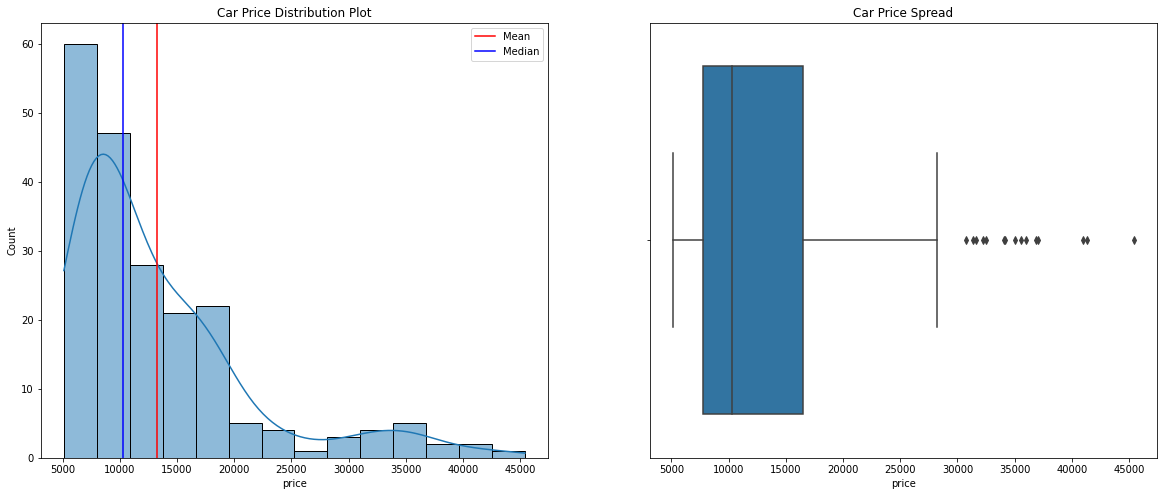

In [19]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.histplot(car.price, kde= True)
plt.axvline(car.price.mean(), color='r', label='Mean')
plt.axvline(car.price.median(), color='b',label='Median')
plt.legend()


plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(x=car.price)

plt.show()

In [20]:
def cat_count_box(var):
    plt.figure(figsize=(20,8))

    plt.subplot(1,2,1)
    plt.title(f'Distribution of {var}')
    sns.countplot(x=car[var], palette=("cubehelix"))
    
    plt.subplot(1,2,2)
    plt.title('Symboling vs Price')
    sns.boxplot(x=car[var], y=car.price, palette=("cubehelix"))

    plt.show()

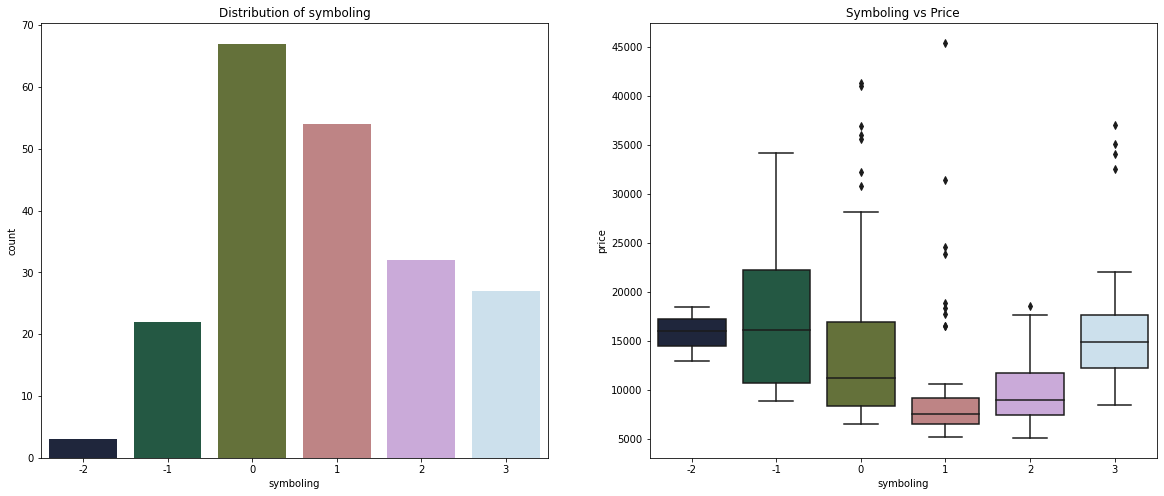

In [21]:
cat_count_box('symboling')

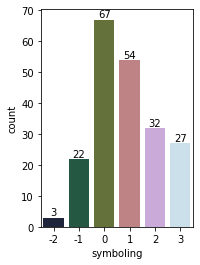

In [22]:
plt.subplot(1,2,1)
ax = sns.countplot(x= car['symboling'], palette=("cubehelix"))
ax.bar_label(ax.containers[0])
plt.show()